In [44]:
#Prediccion Controlador
from keras.models import load_model

model = load_model('CONTROLADORdef.keras')

import numpy as np

x_input = np.array([[-0.015, 0.022]])  # ingresar pocisiones x,y
y_pred = model.predict(x_input)

print("Predicción:", y_pred)

# Extraer valores de la tupla
th1, th2 = y_pred[0]

# Mostrar resultado
print(f"th1={th1}  th2={th2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicción: [[0.5879149 3.0981238]]
th1=0.5879148840904236  th2=3.098123788833618


In [46]:
#Prediccion Robot
import keras
modelo_cargado = keras.saving.load_model('ROBOT_q-X.keras')

import numpy as np

nuevas_entradas = np.array([[th1, th2]], dtype=np.float32) # ingresar angulos t1 y th2
pred = modelo_cargado.predict(nuevas_entradas)
print(f"Predicción: x = {pred[0,0]:.4f}, y = {pred[0,1]:.4f}")

# Extraer valores de la tupla
x, y = pred[0]

# Mostrar resultado
print(f"x={x:.4f}  y={y:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicción: x = -0.0137, y = 0.0328
x=-0.0137  y=0.0328


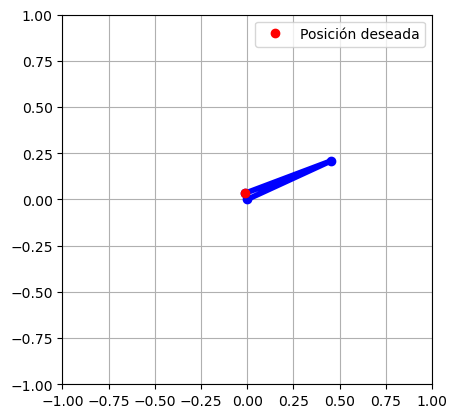

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Longitudes de los eslabones
l1 = 0.5
l2 = 0.5

# Posición deseada (cambia esto si quieres)
xd = x
yd = y
#  Cinemática inversa
D = (xd**2 + yd**2 - l1**2 - l2**2) / (2 * l1 * l2)
if abs(D) > 1:
    raise ValueError("Posición fuera del espacio alcanzable")

q2_d = np.arccos(D)
q1_d = np.arctan2(yd, xd) - np.arctan2(l2 * np.sin(q2_d), l1 + l2 * np.cos(q2_d))

# Posición inicial
q1_init = 0.0
q2_init = 0.0

# Interpolación (movimiento suave)
n_frames = 100
q1_traj = np.linspace(q1_init, q1_d, n_frames)
q2_traj = np.linspace(q2_init, q2_d, n_frames)

# Crear figura
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.grid(True)

# Elementos gráficos
line, = ax.plot([], [], 'o-', lw=4, color='blue')
target, = ax.plot(xd, yd, 'ro', label='Posición deseada')
ax.legend()

# Función de actualización
def update(i):
    q1 = q1_traj[i]
    q2 = q2_traj[i]
    
    x0, y0 = 0, 0
    x1 = l1 * np.cos(q1)
    y1 = l1 * np.sin(q1)
    x2 = x1 + l2 * np.cos(q1 + q2)
    y2 = y1 + l2 * np.sin(q1 + q2)
    
    line.set_data([x0, x1, x2], [y0, y1, y2])
    return line,

# Crear animación
ani = FuncAnimation(fig, update, frames=n_frames, interval=50, blit=True)

# Mostrar la animación en Jupyter
HTML(ani.to_jshtml())